# Installatievereisten, basisinfo en manuele updates

In [ ]:
# Installeren van de vereiste modules
# OPGELET: dit moet slechts 1x uitgevoerd worden!
%pip install -r requirements.txt

In [ ]:
from src.database_tools import Base
from src.utils.sqlalchemy_model_utils import alle_modellen_en_kolommen

# afdrukken van de SQLAlchemy-modellen en hun bijhorende kolommen met de eventule omschrijvingen van Elia
print(alle_modellen_en_kolommen(Base))

In [ ]:
from src.utils.constants_inspector import list_module_constants
import settings

# afdrukken van de huidige standaardwaarden van de bestandsnamen en paden
constants = list_module_constants(settings)

In [ ]:
from src.data_import_tools import update_data
from src.database_tools import to_sql

# updaten van de data-bestanden (JSON en CSV) en bijwerken van de sqlite database
# bij voorkeur uitvoeren via auto_update.py

if input("Mogen de bestanden en de database bijgewerkt worden? OPGELET: dit duurt lang! (J/N)").upper() == "J":
    update_data(data_type="all")
    to_sql(data_type="all")

# Samenvattingen en visualisaties

In [1]:
import src.data_extraction as de
import src.visualisation_tools as vt

# Kies de gewenste taal voor de overzichten ("nl", "fr", "en")
lang = "nl"
# Kies voor korte of lange namen van weekdagen/maanden (True of False)
short = True

### Overzicht gemiddelde Belpex-prijzen met heatmap

In [2]:
de.get_belpex_pivot(lang=lang, short=short, include_totals=True)

,Jan,Feb,Mrt,Apr,Mei,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Jaar
Jaar,,,,,,,,,,,,,
2020,37.884624,28.354770,24.017995,14.723847,15.394462,25.557264,29.842527,35.539583,44.230931,39.433414,39.917153,47.377930,31.856208
2021,57.456774,48.565774,46.610000,56.992500,55.630806,74.444194,77.417661,79.466263,136.207097,165.304892,202.152375,245.442876,103.807601
2022,191.403871,162.637872,265.713580,186.593222,176.636478,219.099264,321.330040,448.133387,346.505375,157.465215,180.411333,269.276371,243.767167
2023,130.695511,143.512277,109.593755,105.534472,80.180296,93.144222,75.351747,91.962473,94.348639,86.503575,91.471097,69.400874,97.641578
2024,78.560094,61.515374,61.169246,48.012500,54.446317,59.801458,54.556022,65.533535,66.650444,77.884194,108.941958,105.222016,70.191097
2025,111.997433,128.749048,91.205491,73.385597,61.069449,65.325500,83.070712,68.979973,63.604708,75.157970,86.189181,85.350739,82.840483


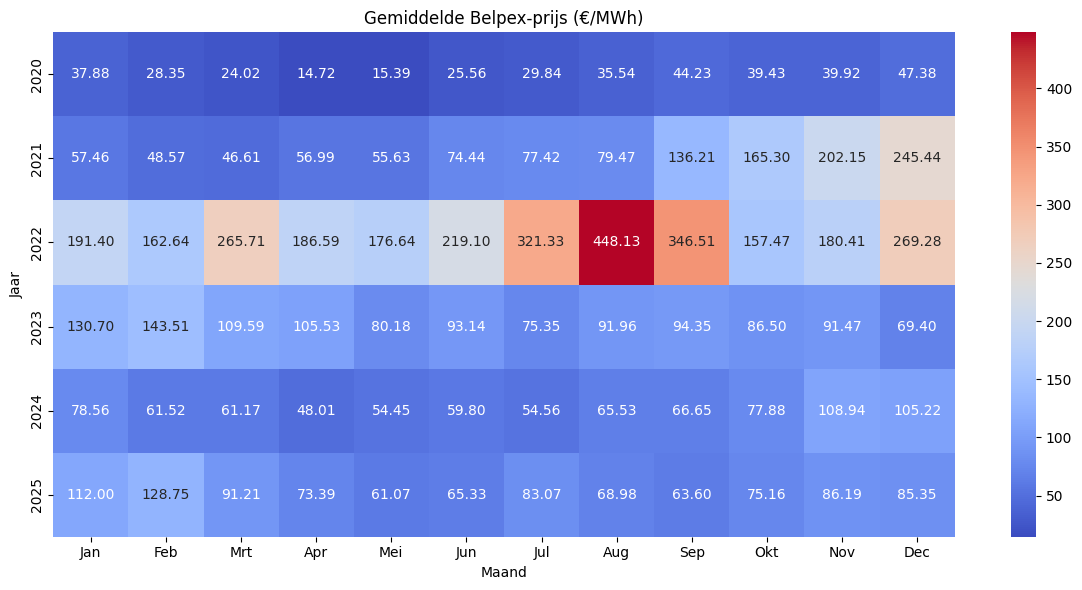

In [3]:
vt.plot_belpex_heatmap(lang=lang, short=short)

### Overzicht zonne-energieproductie

In [4]:
de.get_solar_pivot(lang=lang, short=short, include_totals=True)

,Jan,Feb,Mrt,Apr,Mei,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Jaar
Jaar,,,,,,,,,,,,,
2020,81.233361,137.920462,385.788669,580.997449,683.332158,577.626157,547.606998,494.763789,396.619298,180.042712,125.554716,65.797799,4257.283568
2021,86.335143,213.960166,444.928377,596.470991,629.832528,654.658448,596.587377,517.217624,475.353801,273.906633,125.145622,63.565168,4677.961879
2022,99.230023,221.629894,559.463594,714.004106,887.548877,874.732220,935.738809,859.264380,544.573412,427.432459,198.316885,97.865269,6419.799926
2023,125.118797,320.374089,470.625046,773.912415,1036.180079,1170.438638,905.378921,848.437094,793.563137,443.830854,196.374139,110.125246,7194.358453
2024,233.878401,243.905737,601.004218,841.501835,988.511002,1201.713398,1217.969641,1254.467677,819.903693,581.456736,212.901939,128.664917,8325.879193
2025,206.407657,468.213693,997.726491,1260.156355,1318.637683,1370.475272,1288.815998,1277.239589,984.079501,464.271165,315.601268,248.432004,10200.056676


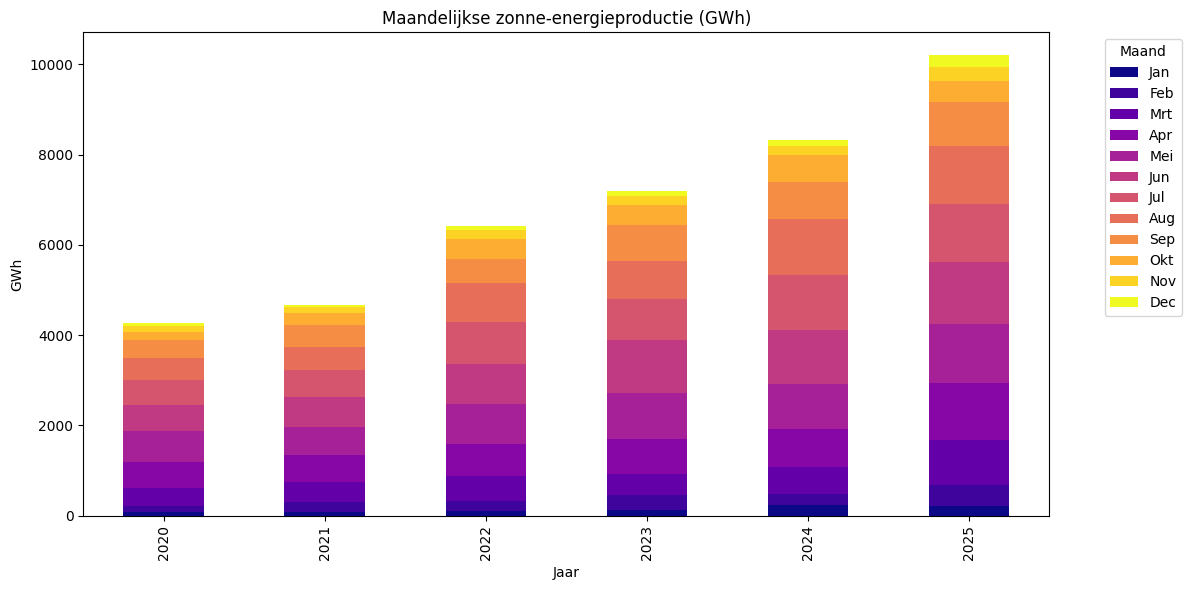

In [5]:
vt.plot_solar(lang=lang, short=short, layout="years")

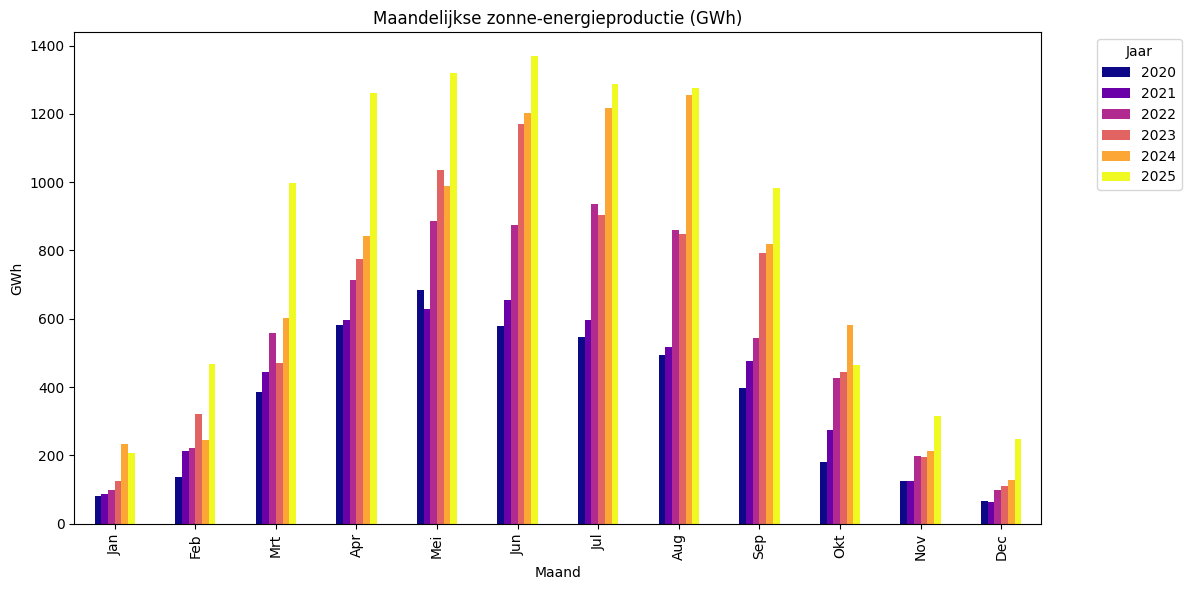

In [6]:
vt.plot_solar(lang=lang, short=short,layout="months")

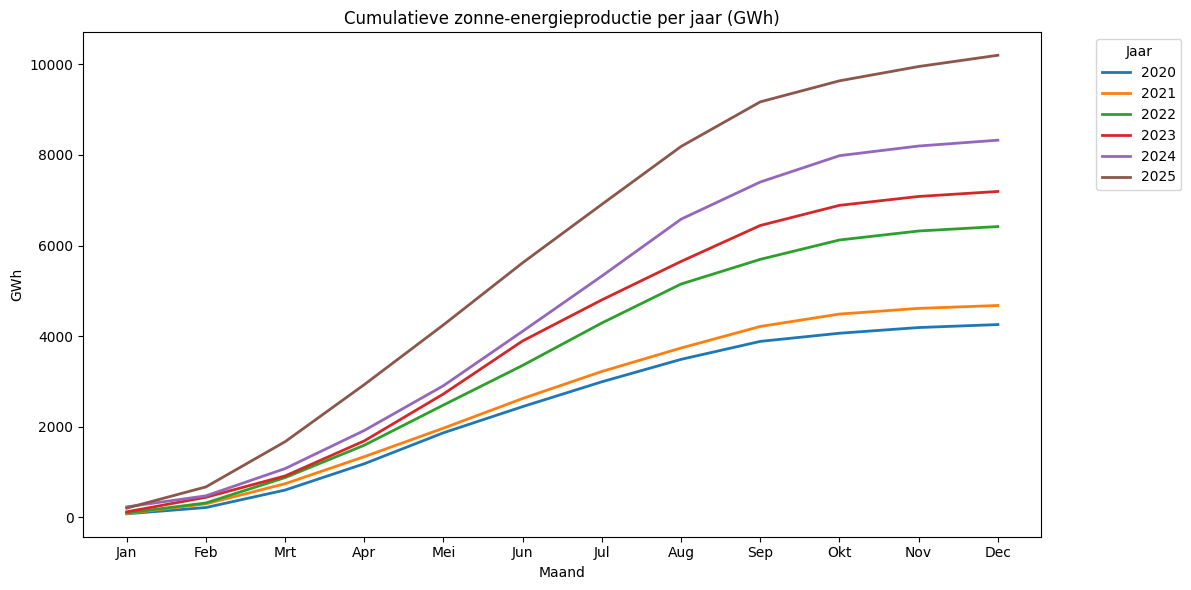

In [7]:
vt.plot_solar(lang=lang, short=short,layout="cumulative")

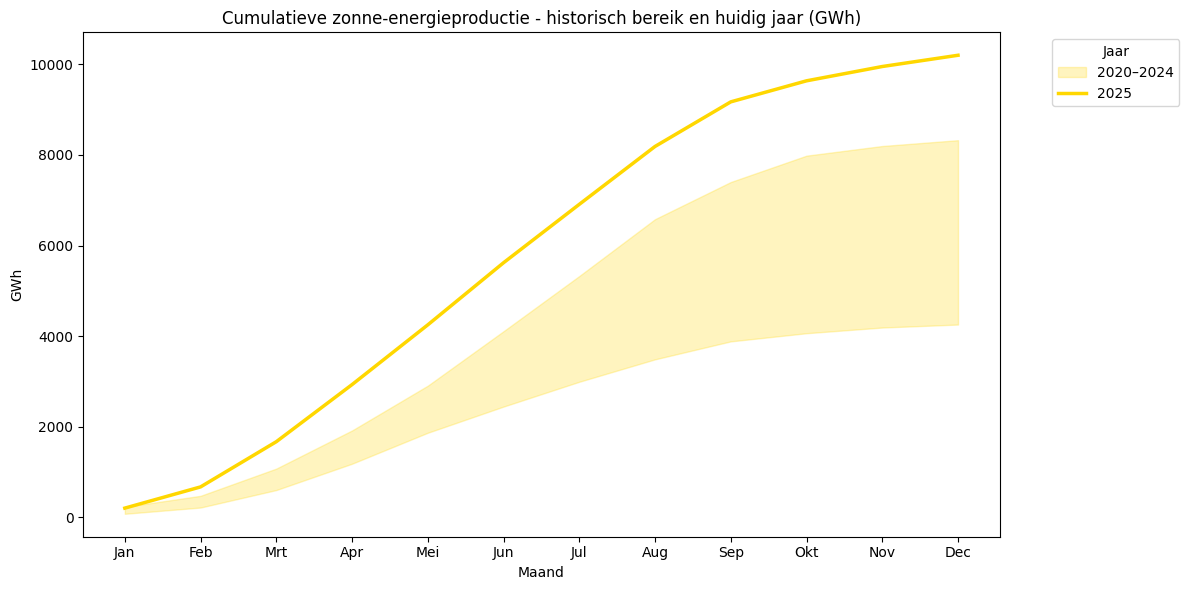

In [8]:
vt.plot_solar(lang=lang, short=short,layout="cumulative_zone")

### Overzicht windproductie opgesplitst in Offshore/Onshore

In [9]:
de.get_wind_pivot_split(lang=lang, short=short, include_totals=True)

Jan          Feb         Mrt         Apr  \
offshoreonshore year                                                    
Offshore        2020  629.455555   803.265693  701.571200  343.023570   
                2021  735.769437   815.498325  608.236830  485.699993   
                2022  655.829715  1002.401397  408.057125  577.319445   
                2023  979.255895   559.765988  819.951835  531.951582   
                2024  923.938053   845.412540  571.987560  771.806550   
                2025  561.332922   532.592890  272.818415  354.199830   
Onshore         2020  445.170345   629.525022  438.540750  227.851750   
                2021  388.349703   439.664770  395.339268  292.295510   
                2022  375.402138   677.050088  308.793945  383.959240   
                2023  808.614805   473.602260  701.324995  419.312338   
                2024  690.748528   713.858902  468.065182  615.739647   
                2025  506.415525   395.571028  300.669780  304.957072   

                             Mei         Jun         Jul         Aug  \
offshoreonshore year                                                   
Offshore        2020  418.132015  361.296458  369.884830  354.975040   
                2021  462.096563  212.882885  404.703700  532.441637   
                2022  393.904122  357.661245  277.624718  262.024770   
                2023  463.265508  399.657075  733.672588  438.555185   
                2024  340.212300  374.213928  399.508258  466.980698   
                2025  550.085582  584.416147  296.162762  411.312290   
Onshore         2020  244.105703  194.462142  203.318525  202.398040   
                2021  426.987287  144.931800  251.980642  254.496165   
                2022  236.651540  198.864225  192.063907  205.630325   
                2023  318.544290  254.818395  461.301155  297.329307   
                2024  260.271563  273.801607  282.067885  282.408160   
                2025  394.045520  353.530468  252.783727  267.503305   

                             Sep         Okt         Nov          Dec  \
offshoreonshore year                                                    
Offshore        2020  439.716850  879.189905  639.779502   790.849887   
                2021  330.655745  806.279830  591.130890   794.920035   
                2022  437.826225  640.738822  907.409613   723.091030   
                2023  355.025170  810.473183  961.141515  1076.677698   
                2024  514.633168  435.500205  548.720573   878.087050   
                2025  726.991220  726.941238  854.024140   888.521470   
Onshore         2020  186.106580  493.041855  394.022688   431.959265   
                2021  189.313358  487.519190  278.006857   431.420532   
                2022  254.583033  440.336075  576.939667   517.085897   
                2023  296.417008  558.301368  767.248085   858.076182   
                2024  414.228465  357.386222  439.762140   700.314597   
                2025  496.800532  526.115660  641.855042   920.871815   

                             Jaar  
offshoreonshore year               
Offshore        2020  6731.140505  
                2021  6780.315870  
                2022  6643.888227  
                2023  8129.393220  
                2024  7071.000880  
                2025  6759.398908  
Onshore         2020  4090.502665  
                2021  3980.305083  
                2022  4367.360080  
                2023  6214.890188  
                2024  5498.652900  
                2025  5361.119475

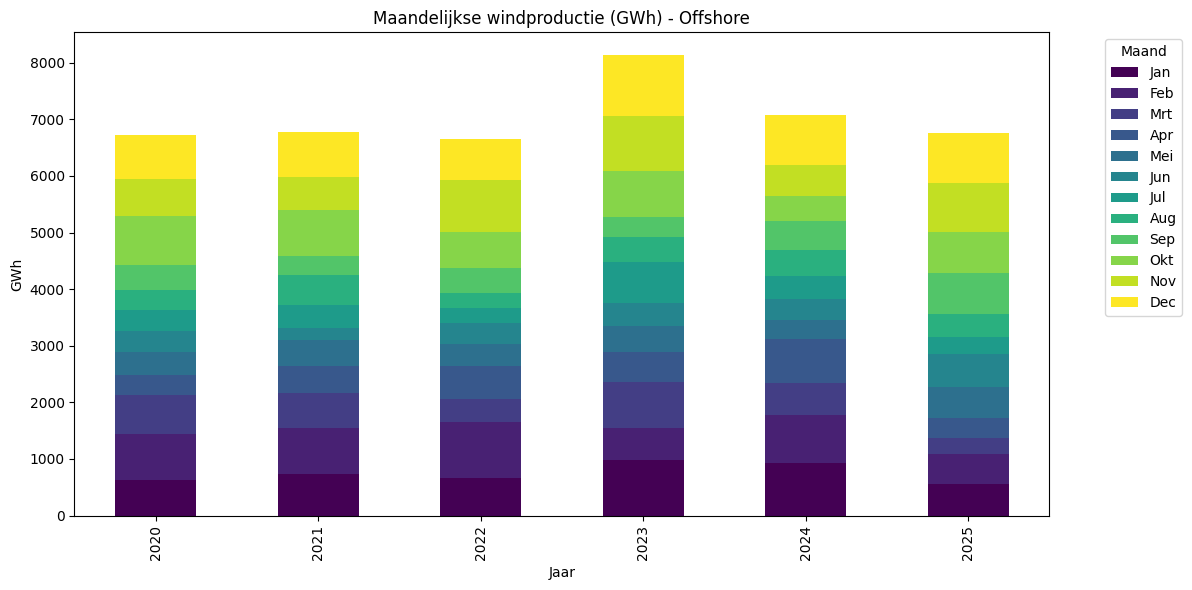

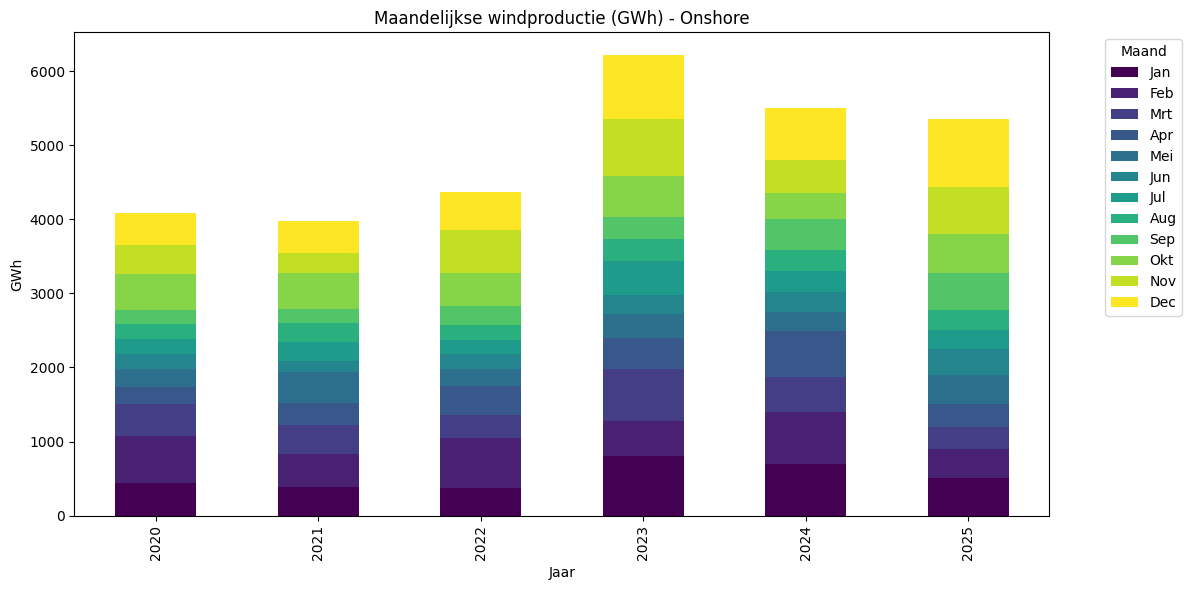

In [10]:
vt.plot_wind_split(lang=lang, short=short)

### Overzicht totale windproductie

In [11]:
de.get_wind_pivot_total(lang=lang, short=short, include_totals=True)

,Jan,Feb,Mrt,Apr,Mei,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Jaar
Jaar,,,,,,,,,,,,,
2020,1074.625900,1432.790715,1140.111950,570.875320,662.237718,555.758600,573.203355,557.373080,625.823430,1372.231760,1033.802190,1222.809152,10821.643170
2021,1124.119140,1255.163095,1003.576098,777.995502,889.083850,357.814685,656.684343,786.937802,519.969102,1293.799020,869.137748,1226.340567,10760.620952
2022,1031.231853,1679.451485,716.851070,961.278685,630.555662,556.525470,469.688625,467.655095,692.409257,1081.074897,1484.349280,1240.176927,11011.248308
2023,1787.870700,1033.368248,1521.276830,951.263920,781.809797,654.475470,1194.973742,735.884493,651.442177,1368.774550,1728.389600,1934.753880,14344.283407
2024,1614.686580,1559.271442,1040.052743,1387.546198,600.483863,648.015535,681.576142,749.388858,928.861632,792.886427,988.482713,1578.401647,12569.653780
2025,1067.748448,928.163918,573.488195,659.156903,944.131102,937.946615,548.946490,678.815595,1223.791753,1253.056897,1495.879183,1809.393285,12120.518383


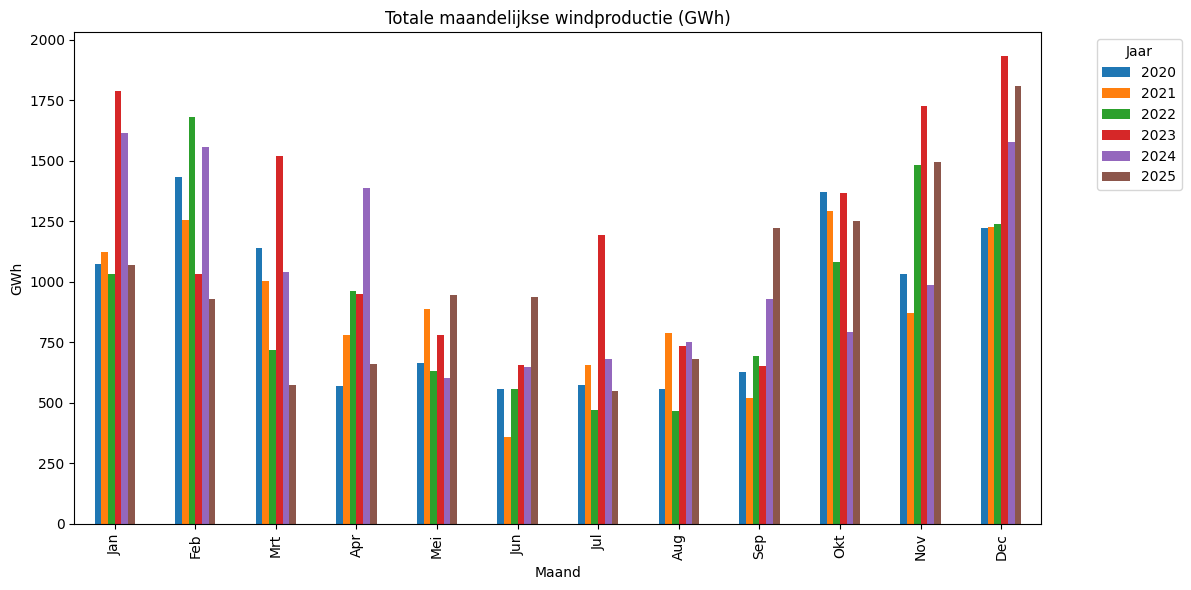

In [12]:
vt.plot_wind_total(lang=lang, short=short,layout="months")

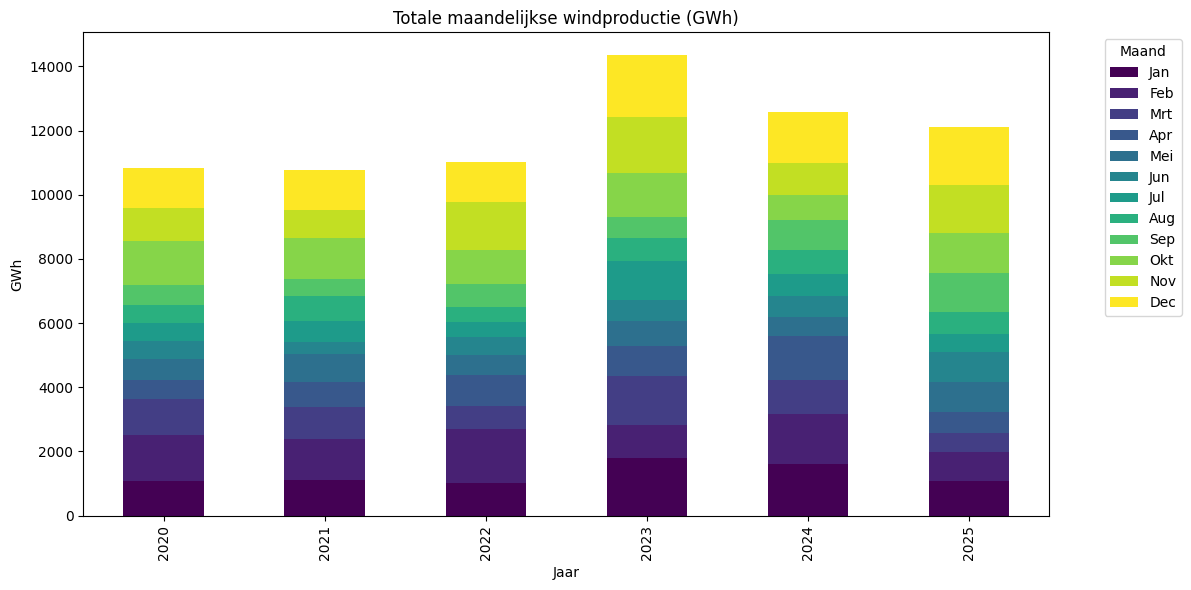

In [13]:
vt.plot_wind_total(lang=lang, short=short,layout="years")

### Overzicht van de productie van hernieuwbare energie en de bijhorende Belpex spotmarktprijzen

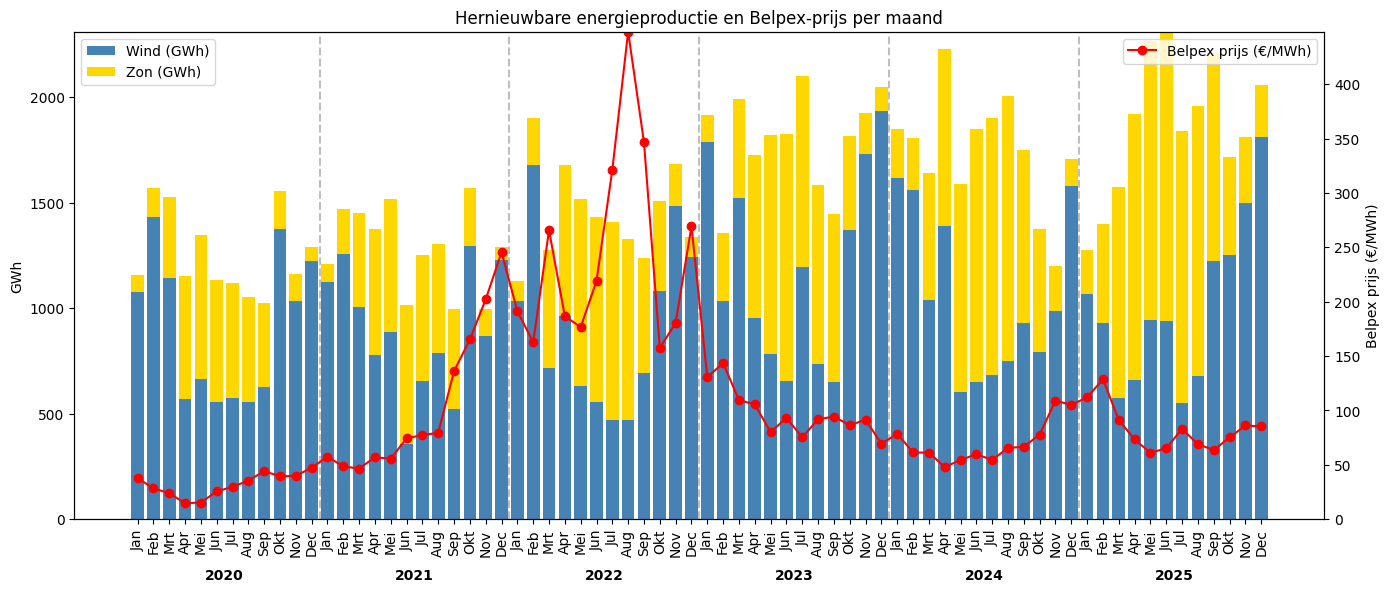

In [14]:
vt.plot_combined(lang=lang, short=short)

### Frequentie negatieve prijzen

In [15]:
de.get_negative_price_counts_pivot(lang=lang, short=short, cumulative=False, include_totals=True)

,Jan,Feb,Mrt,Apr,Mei,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Jaar
Jaar,,,,,,,,,,,,,
2020,0,4,14,37,35,9,20,0,0,3,6,8,136
2021,0,6,32,19,27,8,19,22,0,14,0,12,159
2022,5,11,16,21,20,18,4,2,1,3,1,10,112
2023,17,0,14,6,19,10,52,9,20,25,0,50,222
2024,12,0,5,56,64,73,79,70,29,17,2,1,408
2025,0,0,32,80,122,127,11,58,58,31,0,0,519


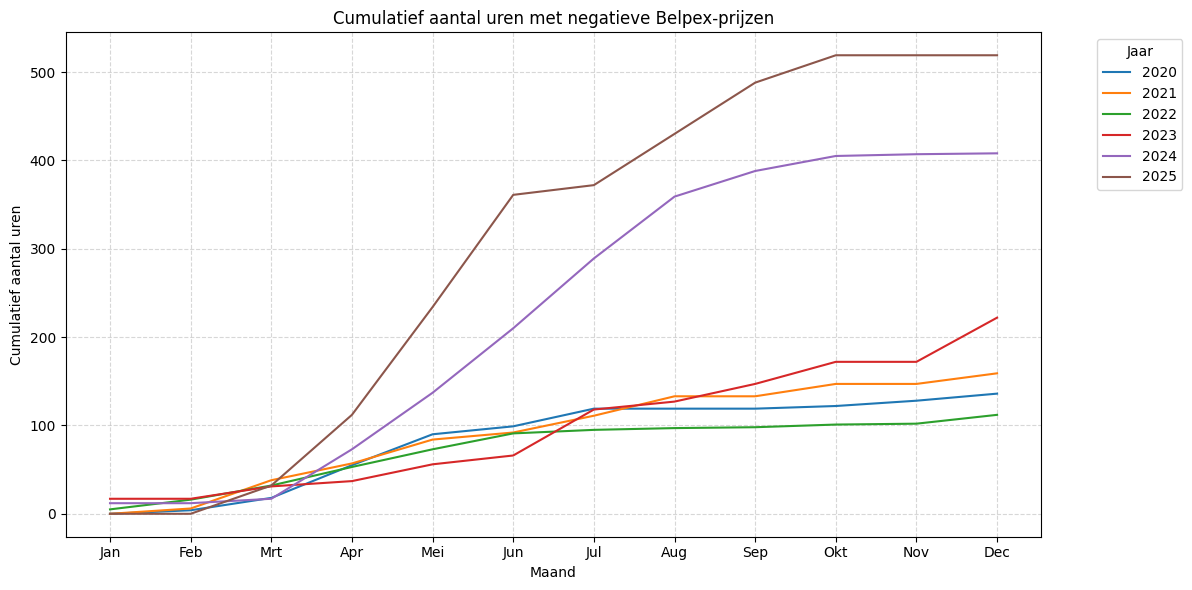

In [16]:
vt.plot_negative_price_counts_cumulative(lang=lang,short=short)

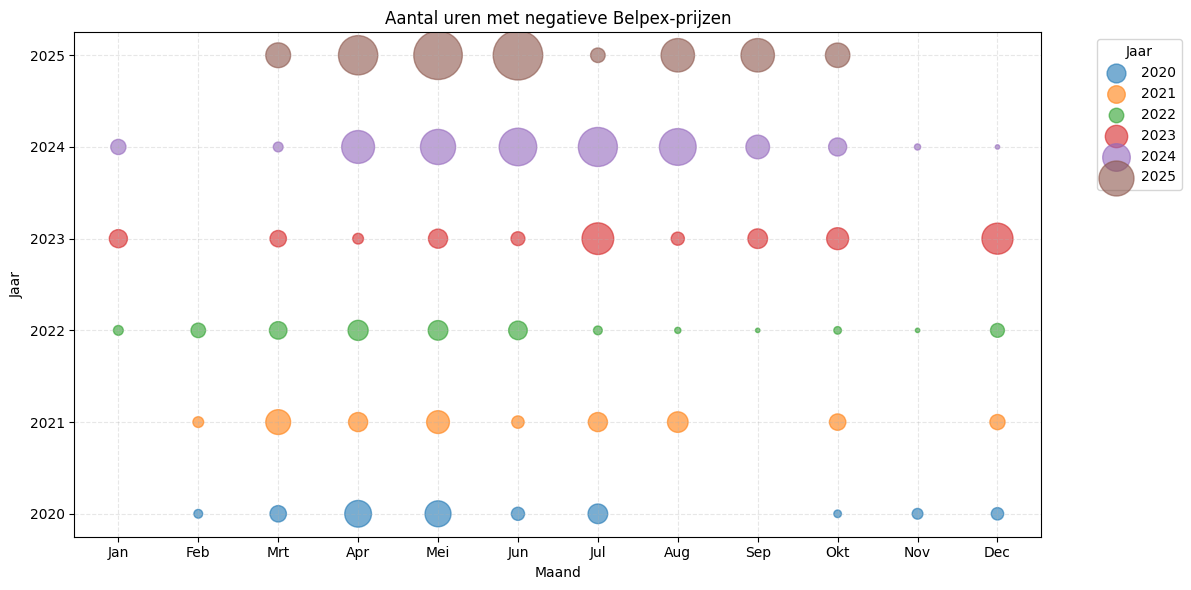

In [17]:
vt.plot_negative_price_counts_bubble(lang=lang,short=short)

### Overzicht jaarlijkse piekproductie van hernieuwbare energie (wind + zon)

In [18]:
de.get_peak_renewable_production(lang=lang)

,Datum,Tijdstip,Piek productie hernieuwbaar in MW
0,2020-05-11,10:00:00,5824
1,2021-05-21,12:45:00,6420
2,2022-05-11,10:45:00,7112
3,2023-05-29,11:15:00,8043
4,2024-08-22,10:45:00,9899
5,2025-04-22,09:45:00,11297


### Belpex evolutie uurprijzen

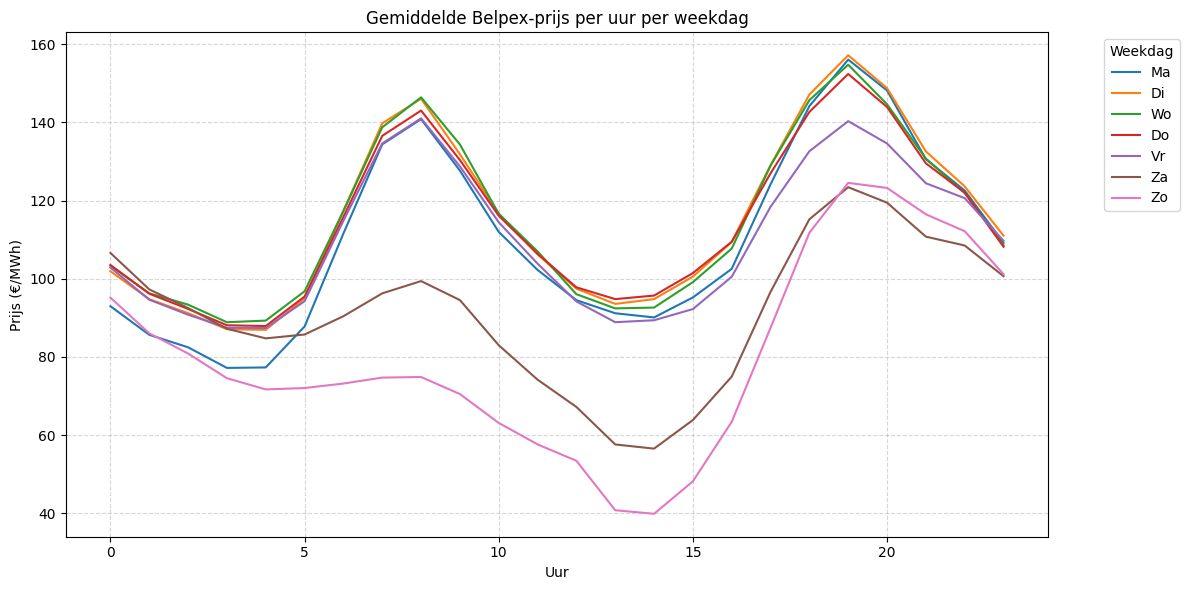

In [19]:
vt.plot_belpex_hourly(lang=lang,short=short, group_by="weekday")

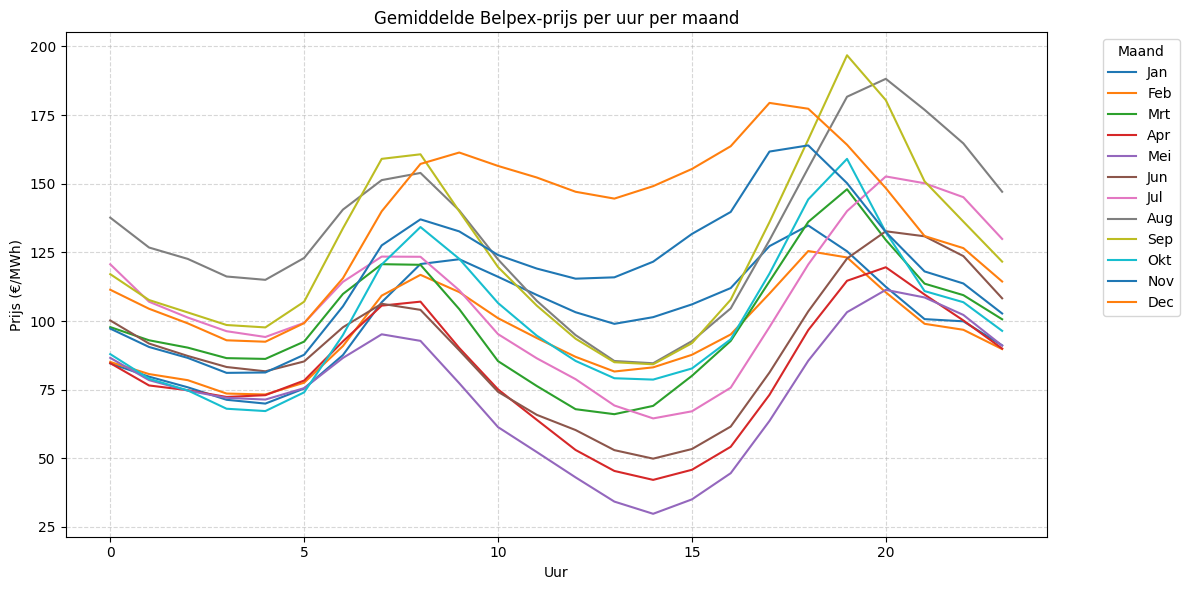

In [20]:
vt.plot_belpex_hourly(lang=lang,short=short, group_by="month")

### Interactieve grafieken

In [21]:
vt.plot_interactive(energytype="wind",lang=lang, short=short,layout="years")

In [22]:
vt.plot_interactive(energytype="wind",lang=lang, short=short,layout="months")

In [23]:
vt.plot_interactive(energytype="wind",lang=lang, short=short,layout="cumulative")

In [24]:
vt.plot_interactive(energytype="solar",lang=lang, short=short,layout="years")

In [25]:
vt.plot_interactive(energytype="solar",lang=lang, short=short,layout="months")

In [26]:
vt.plot_interactive(energytype="solar",lang=lang, short=short,layout="cumulative")